In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
import re

# 加载数据集
categories = [
    'alt.atheism',
    'comp.graphics',
    'comp.os.ms-windows.misc',
    'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware',
    'comp.windows.x',
    'misc.forsale',
    'rec.autos',
    'rec.motorcycles',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'sci.crypt',
    'sci.electronics',
    'sci.med',
    'sci.space',
    'soc.religion.christian',
    'talk.politics.guns',
    'talk.politics.mideast',
    'talk.politics.misc',
    'talk.religion.misc'
]

newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers','footers', 'quotes'),shuffle=True, random_state=42)

# 去除停用词、数字和符号，提取文本特征
lemmatizer = WordNetLemmatizer()
preprocessed_data = []

for document in newsgroups_data.data:
    # 去除数字和符号
    document = re.sub(r'\d+', ' ', document)
    document = re.sub(r'\W', ' ', document)

    # 去除停用词并进行词形还原
    words = [lemmatizer.lemmatize(word) for word in document.lower().split() if word not in _stop_words.ENGLISH_STOP_WORDS]

    # 将预处理后的文本重新组合成字符串
    preprocessed_data.append(' '.join(words))

In [2]:
print(preprocessed_data[0])
print(preprocessed_data[1])

sure bashers pen fan pretty confused lack kind post recent pen massacre devil actually bit puzzled bit relieved going end non pittsburghers relief bit praise pen man killing devil worse thought jagr just showed better regular season stats lot fo fun watch playoff bowman let jagr lot fun couple game pen going beat pulp jersey disappointed islander lose final regular season game pen rule
brother market high performance video card support vesa local bus mb ram doe suggestion idea diamond stealth pro local bus orchid farenheit ati graphic ultra pro high performance vlb card post email thank matt


In [3]:
# 特征向量化
vectorizer = TfidfVectorizer(max_features=5000)
feature_vectors = vectorizer.fit_transform(preprocessed_data)

In [4]:
from sklearn.cluster import KMeans

# 构建 K-means 模型并进行聚类
k = 20  # 设置聚类数
kmeans = KMeans(n_clusters=k, n_init='auto')
kmeans.fit(feature_vectors)

KMeans(n_clusters=20, n_init='auto')

In [5]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# 评估聚类结果
labels = kmeans.labels_
silhouette_avg = silhouette_score(feature_vectors, labels)
ch_score = calinski_harabasz_score(feature_vectors.toarray(), labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {ch_score}")


Silhouette Score: 0.008728044812123888
Calinski-Harabasz Score: 36.139269563209574


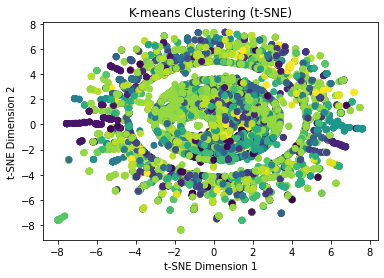

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 使用 t-SNE 将特征向量降维至 2D
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(feature_vectors.toarray())

# 可视化聚类结果
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels)
plt.title('K-means Clustering (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
